In [1]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

## SVD разложение

In [2]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [3]:
X, y = load_digits(return_X_y=True)

In [4]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


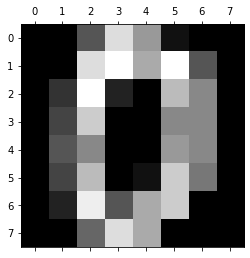

In [5]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [6]:
U, s, V = np.linalg.svd(image)
n_component = 3
S = np.diag(s)[:, :n_component]
V = V[:n_component, :]
A = U.dot(S.dot(V))
print(A)

[[0.00 -0.79 4.61 13.19 8.75 1.55 0.20 0.00]
 [0.00 1.83 15.30 13.86 11.18 12.21 4.59 0.00]
 [0.00 4.08 13.27 1.91 0.95 11.97 8.72 0.00]
 [0.00 3.69 10.62 0.65 -0.55 9.50 8.09 0.00]
 [0.00 3.41 9.39 0.15 -0.98 8.41 7.51 0.00]
 [0.00 3.55 11.82 -0.08 0.75 11.44 6.77 0.00]
 [0.00 1.15 13.03 5.53 9.41 13.22 0.14 0.00]
 [0.00 -0.87 4.74 13.74 9.19 1.59 0.07 0.00]]


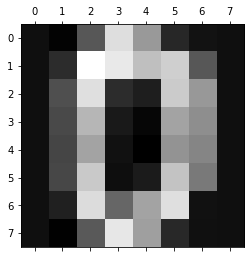

In [7]:
plt.matshow(A, cmap = 'gray')

In [8]:
rf_original = RandomForestClassifier(oob_score=True)
rf_original.fit(X, y)
rf_original.oob_score_

0.9760712298274903

In [9]:
svd = TruncatedSVD(n_components=16)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.8479585524827673

In [10]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.9638286032276016

## Приближение матрицей меньшего ранга

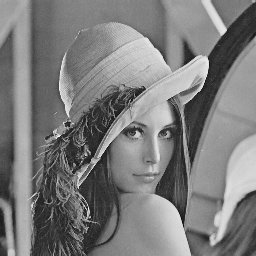

In [16]:
from PIL import Image
img = Image.open("lena.png")
arr = np.array(img.getdata())
img

In [17]:
print(arr.size)
print(arr.size ** 0.5)

65536
256.0


In [18]:
X = np.resize(arr, (256, 256))

In [19]:
U, d, Vt = linalg.svd(X)
D = linalg.diagsvd(d, X.shape[0], X.shape[1])

5


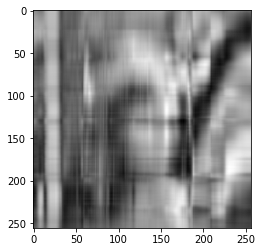

10


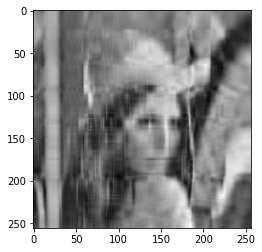

15


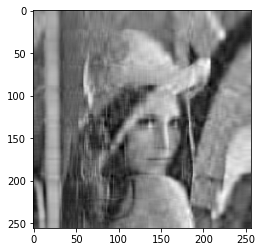

20


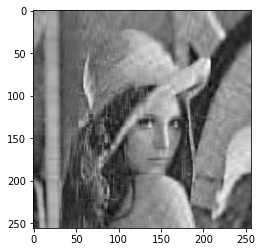

25


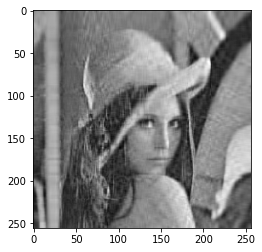

30


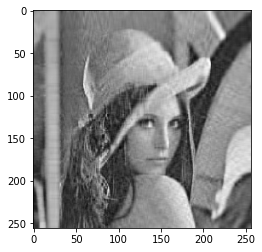

35


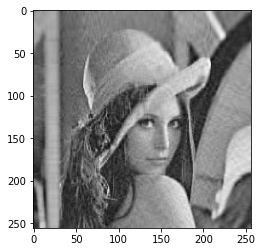

40


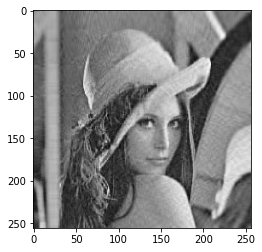

45


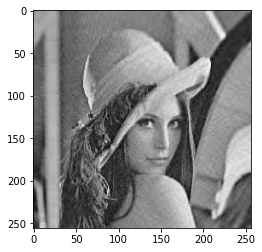

In [20]:
for k in range(5, 50, 5):
    D1 = D.copy()
    D1[D1 < d[int(k)]] = 0
    print (int(k))
    X1 = np.dot(np.dot(U, D1), Vt)
    pl.imshow(X1, cmap='gray')
    pl.show()